<a href="https://colab.research.google.com/github/ask-kawade/-Bike-Sharing-Demand-Prediction-Project/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

import warnings
warnings.filterwarnings('ignore')

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/Superivised learning project/Copy of SeoulBikeData.csv'

In [4]:
# Reading CSV file. 
bike_df=pd.read_csv(file_path,encoding="latin")

# *Data Exploration And Data Cleaning*

In [5]:
# Check Total rows and Columns in dataset.
bike_df.shape

(8760, 14)

In [6]:
# Check the info of dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##***Observations*** 
###1)Rows- 8760
###2)Columns-14
###3)Null values/missing values- 0
###4)Date- columns need to convert into proper data type.

###5)Columns to convert inot numeric
  * seasons
  * holiday
  * functioning day


###6) Rename columns-
   * Temperature(°C)
   * Humidity(%)
   * Wind speed (m/s)
   * Visibility (10m)
   * Dew point temperature(°C)
   * Solar Radiation (MJ/m2)
   * Rainfall(mm)
   * Snowfall (cm)
   * Rented Bike Count,Functioning Day(Beacuse white spaces are present which makes difficult to copy variable name.)
   





In [7]:
# Check columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
 # Rename the columns 
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

In [9]:
# Change The datatype of Date columns to extract 'Month' ,'Day', "year".
bike_df['Date']=bike_df['Date'].astype('datetime64[ns]')


In [10]:
# Creating new columns 'Month', 'Year' ,'Day.
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Year']=bike_df['Date'].dt.year
bike_df['Day']=bike_df['Date'].dt.day_name()

In [11]:
#  Creating new column and Encoding with 1 if its weekend and 0 if its Weekdays.
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


In [12]:
bike_df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [13]:
# Drop Day, year and Date columns

bike_df.drop(['Date',"Day",'Year'],axis=1 ,inplace=True)

In [14]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [15]:
bike_df.tail()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8759,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [16]:
bike_df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Month,Weekdays_or_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [17]:
bike_df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Month                    0
Weekdays_or_weekend      0
dtype: int64

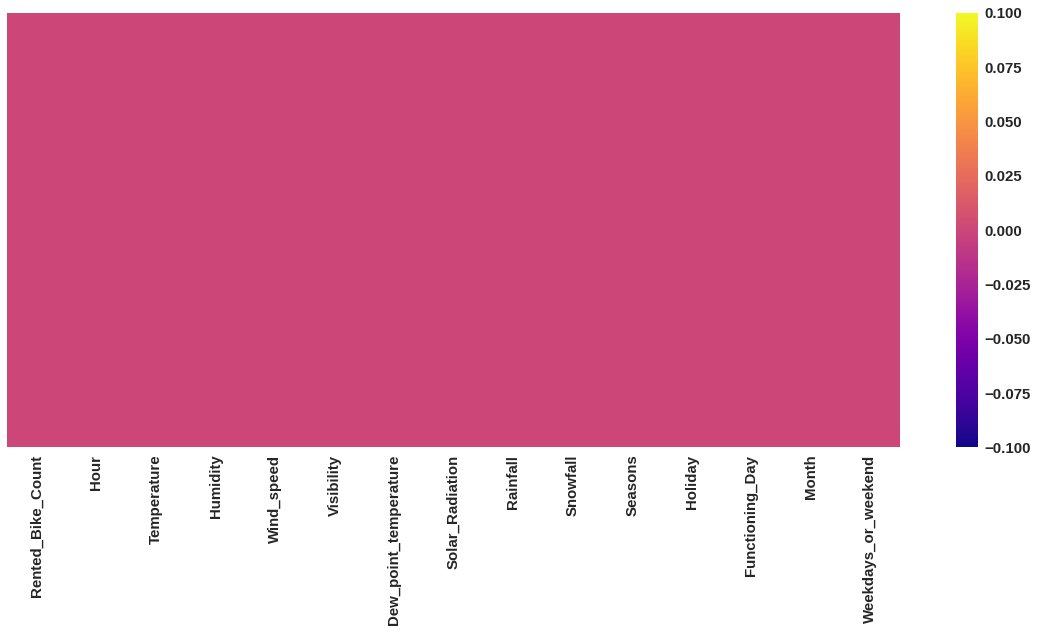

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isnull(),cmap='plasma',annot=False,yticklabels=False)

In [19]:
# checking Duplicate rows
bike_df.duplicated().sum()

# No duplicate rows found

0

In [20]:
bike_df.shape

(8760, 15)

In [21]:
# drop duplicates.
bike_df=bike_df.drop_duplicates()
bike_df.shape

(8760, 15)

In [22]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [23]:
# Creating Numerical columns
numeric_col=['Rented_Bike_Count','Temperature', 'Humidity','Wind_speed', 'Visibility','Dew_point_temperature','Solar_Radiation','Rainfall','Snowfall',]

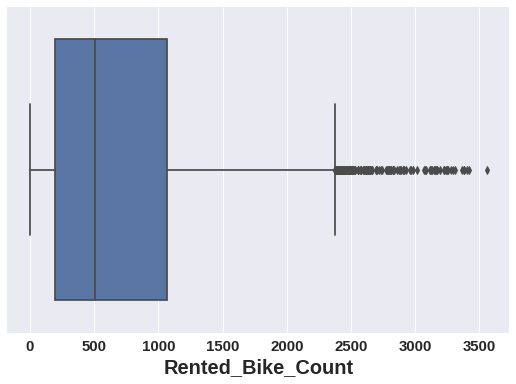

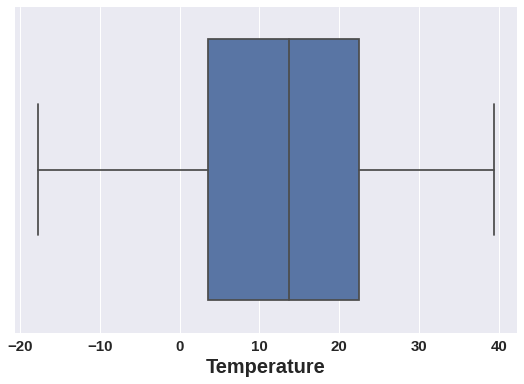

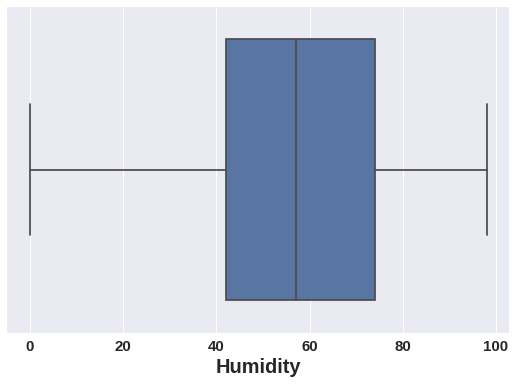

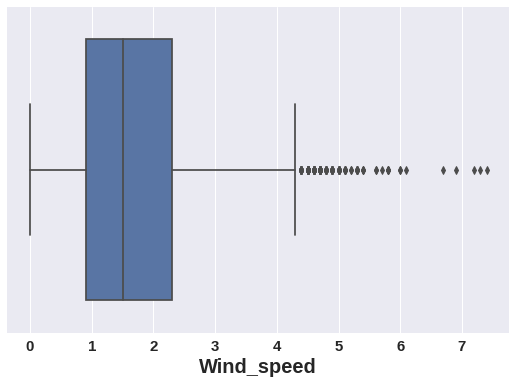

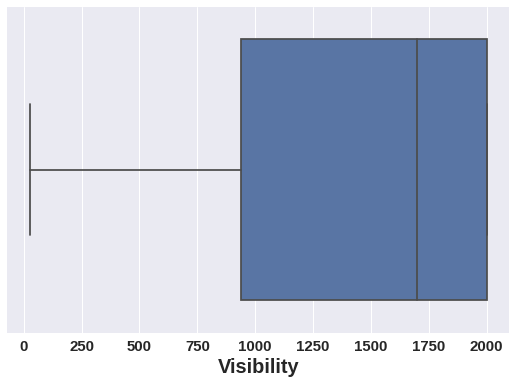

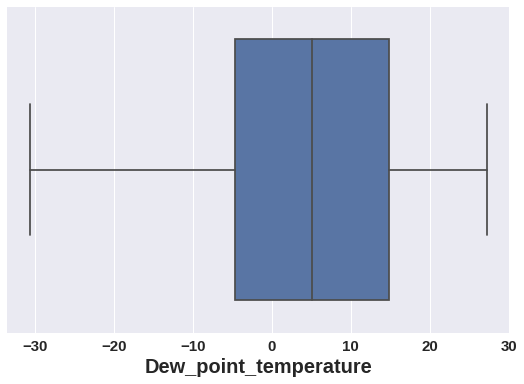

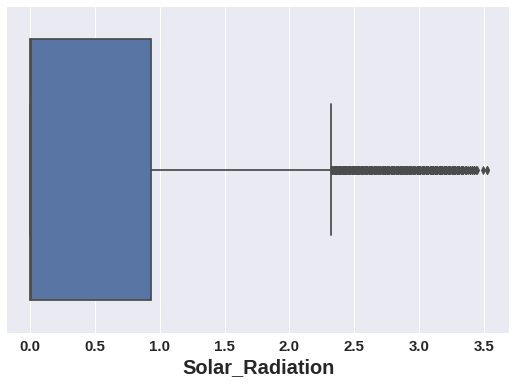

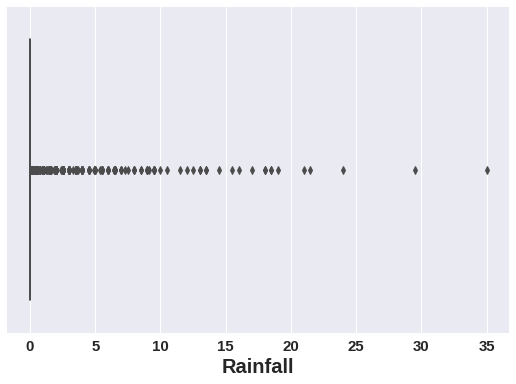

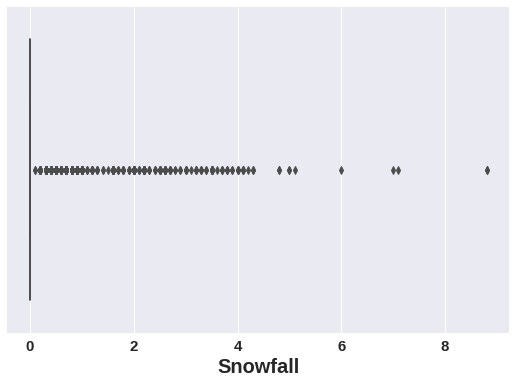

In [24]:

for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=bike_df[col])

In [25]:
# windspeed,snowfall,solar radiations,rainfall,

In [26]:
# def outlier_treatment(datacolumn):
#  sorted(datacolumn)
#  Q1,Q3 = np.percentile(datacolumn , [25,75])
#  IQR = Q3-Q1
#  lower_range = Q1 - (1.5 * IQR)
#  upper_range = Q3 + (1.5 * IQR)
#  return lower_range,upper_range

In [27]:
# lowerbound,upperbound=outlier_treatment([bike_df['Wind_speed']])
# lowerbound1,upperbound1=outlier_treatment([bike_df['Snowfall']])
# lowerbound2,upperbound2=outlier_treatment([bike_df['Solar_Radiation']])
# lowerbound3,upperbound3=outlier_treatment([bike_df['Rainfall']])

In [28]:
# bike_df.drop(bike_df[(bike_df.Wind_speed < lowerbound) | (bike_df.Wind_speed > upperbound)].index,inplace=True)
# bike_df.drop(bike_df[(bike_df.Snowfall < lowerbound1) | (bike_df.Snowfall > upperbound1)].index,inplace=True)
# bike_df.drop(bike_df[(bike_df.Solar_Radiation < lowerbound2) | (bike_df.Solar_Radiation > upperbound2)].index,inplace=True)
# bike_df.drop(bike_df[(bike_df.Rainfall < lowerbound3) | (bike_df.Rainfall > upperbound3)].index,inplace=True)

Tried to detect and treat outliers but got very strange and unexpected result. outliers in the snowfall and rain fall columns cannot be treated as outliers beause data points are peculiar. Data points of rainfalls and snowfalls,wind speed,solar radiations are nature driven.

#Catergorical Columns

In [29]:
cat_columns=['Seasons','Holiday','Functioning_Day','Month','Weekdays_or_weekend']

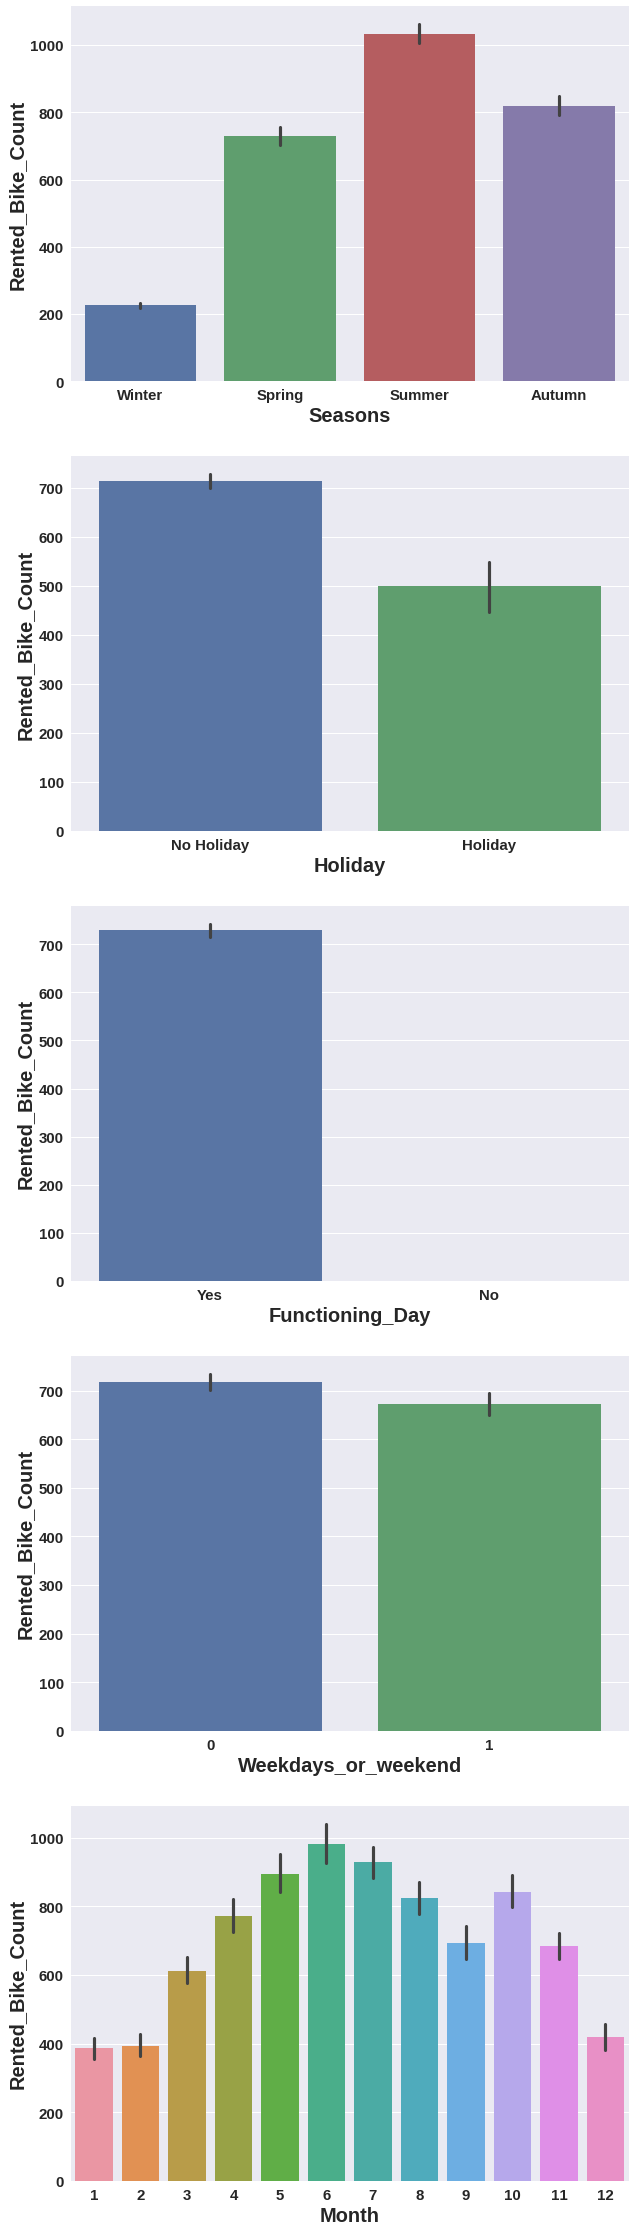

In [30]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10,40))
sns.barplot(data=bike_df, x=bike_df['Seasons'],y=bike_df['Rented_Bike_Count'], ax=ax[0]);
sns.barplot(data=bike_df, x=bike_df['Holiday'],y=bike_df['Rented_Bike_Count'], ax=ax[1]);
sns.barplot(data=bike_df, x=bike_df['Functioning_Day'],y=bike_df['Rented_Bike_Count'], ax=ax[2]);
sns.barplot(data=bike_df, x=bike_df['Weekdays_or_weekend'],y=bike_df['Rented_Bike_Count'], ax=ax[3]);
sns.barplot(data=bike_df, x=bike_df['Month'],y=bike_df['Rented_Bike_Count'], ax=ax[4]);

In [31]:
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

##Observation:
###1) Summer season had the higest Bike Rent Count.
###2) Even if there was no holiday most of the bikes were rented on No Holiday.
###3) On no functioning day no bikes were rented. we have only 295 counts of "NO". Thus we can drop that 295 values but column having only "Yes' will not add value to our column.So these columns is not use full for us. We will drop those in next steps.
### 5) From March Bike rent Count started increasing and it was highest in June. 
### 6) Most of the bikes rentals were on Weekdays comapred to weekends.

#Let's Check bike rental trend with respect hours on Functioning days, weekends or weekdays,seasons.

## Bike Rental trend with respect to Hour.

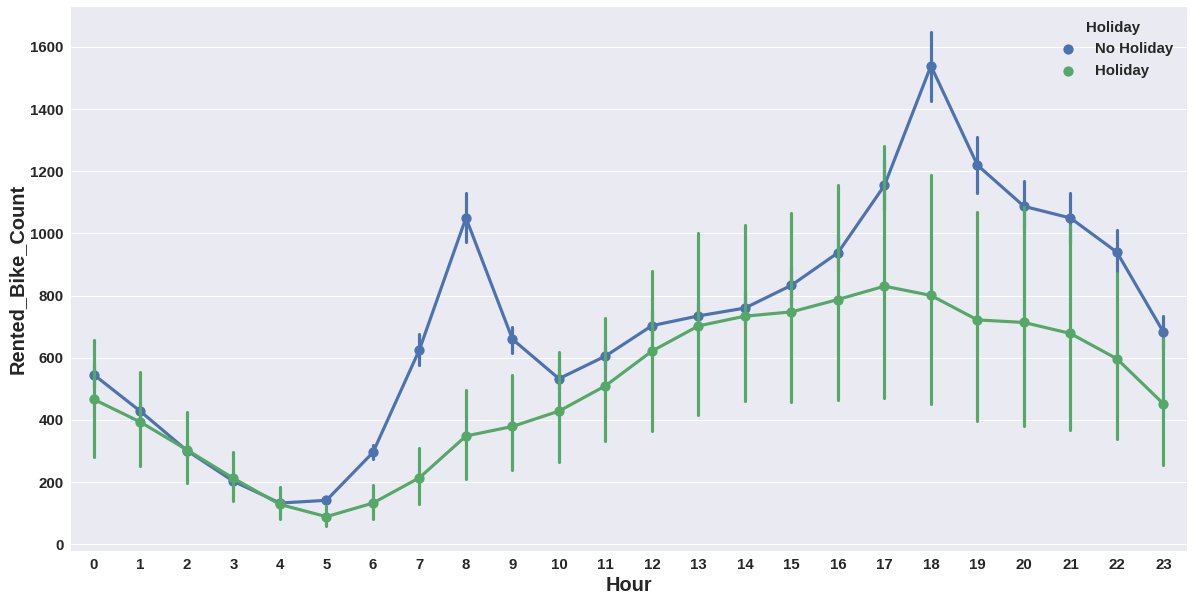

In [32]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Holiday'])

 #### 1)There is sudden peak between 6/7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different  less bike rentals happend.
 #### 2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.( NO Holiday). But 

## Bike Rental trend with respect to Functioning day.

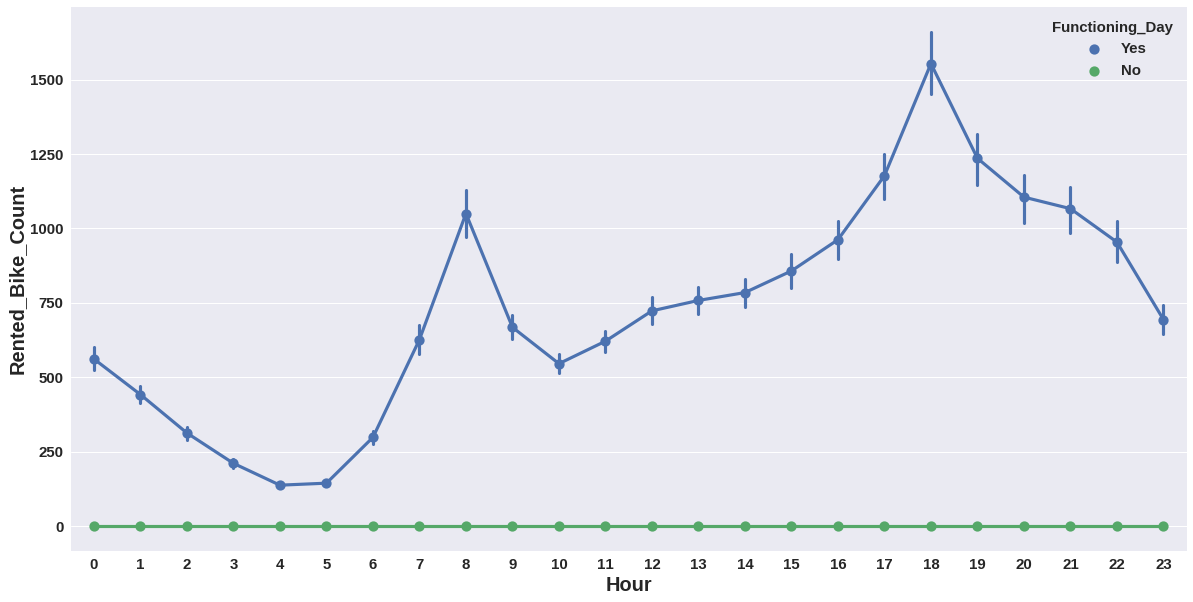

In [33]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Functioning_Day'])

### 1) Here the trend for functioning day is same as of No holiday. Only the difference is on No functioning day there is no bike rentals.
(if we drop no fucntioning day rows. we will left only with the functioning day values.thus the column having same value through out will not be helpful.
So,its better to drop the column.)


In [34]:
bike_df.drop('Functioning_Day',axis=1,inplace=True)

## Bike Rental trend with respect to Seasons.

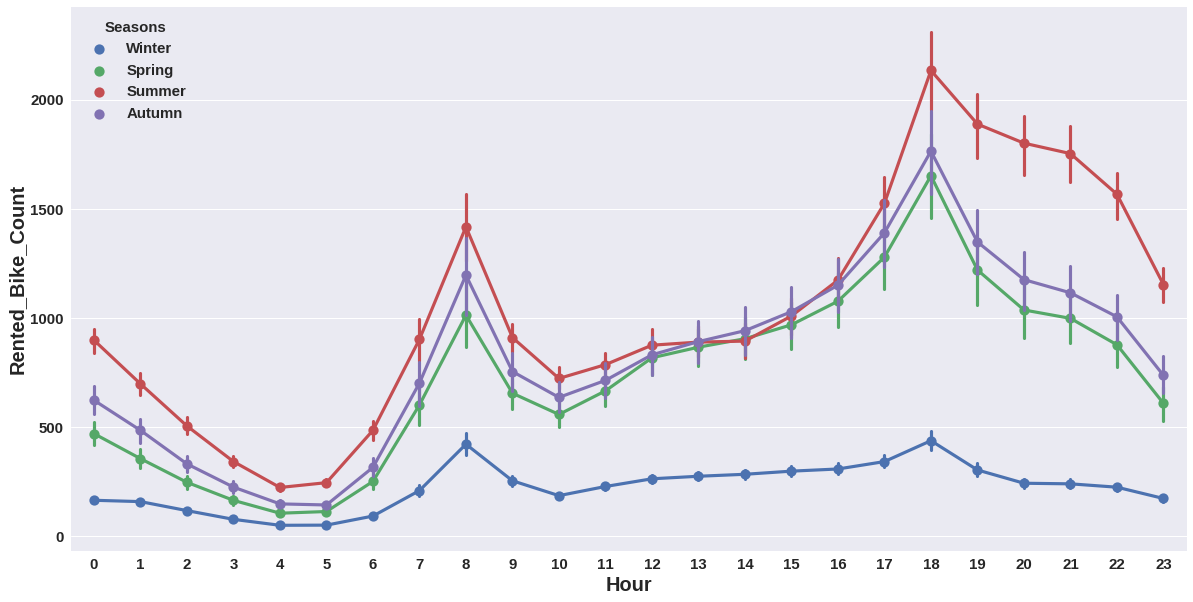

In [35]:
plt.figure(figsize=(20,10))
sns.pointplot(x=bike_df['Hour'],y=bike_df['Rented_Bike_Count'],hue=bike_df['Seasons'])

#  Lets check the distribution of our dependent variable.


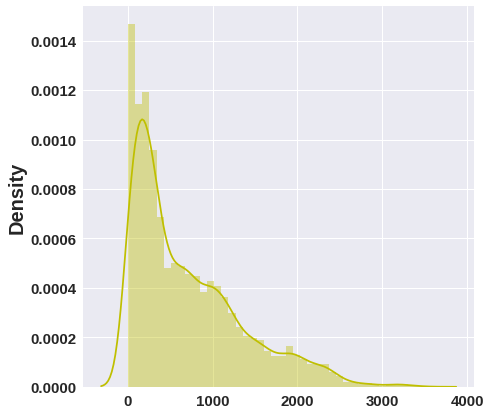

In [36]:
plt.figure(figsize=(7,7))
sns.distplot(x=bike_df['Rented_Bike_Count'],color='y')

###  Our target varibale's distribution is slightly right skewed. 

In [37]:
# Importing stats lib from scipy
from scipy import stats

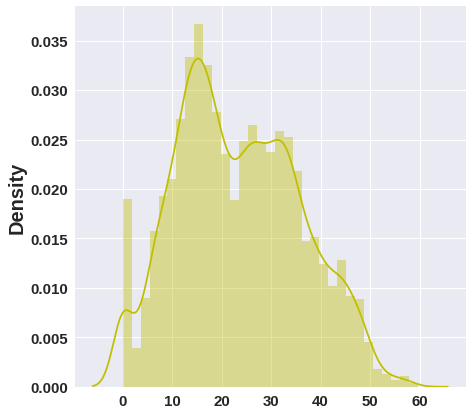

In [38]:
# Normalizing  our target variable by squre root method
plt.figure(figsize=(7,7))
sns.distplot(x=np.sqrt(bike_df['Rented_Bike_Count']),color='y')

In [45]:

numeric_features=['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Month', 'Weekdays_or_weekend']

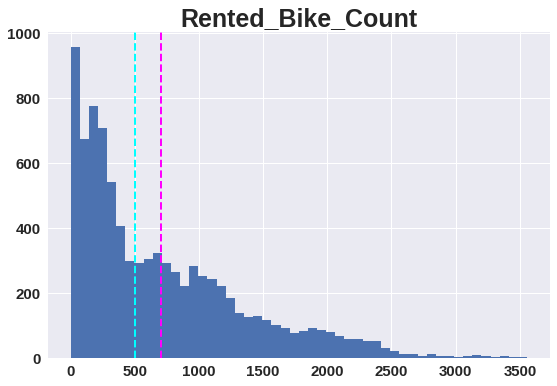

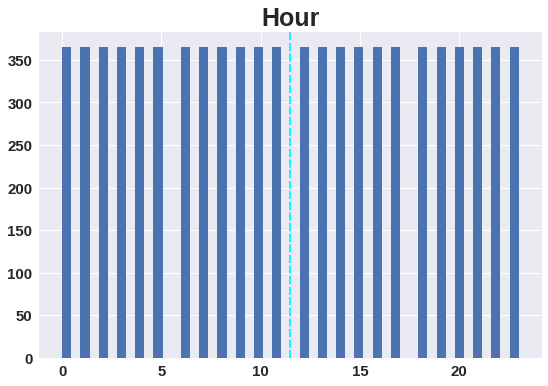

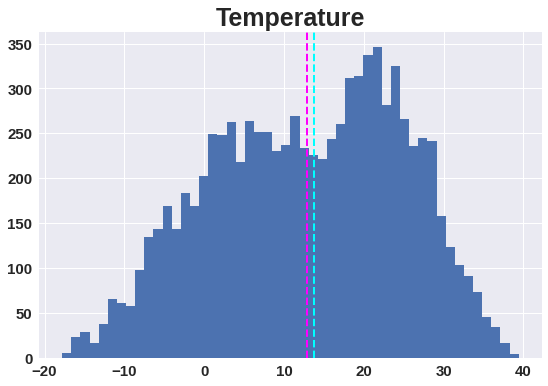

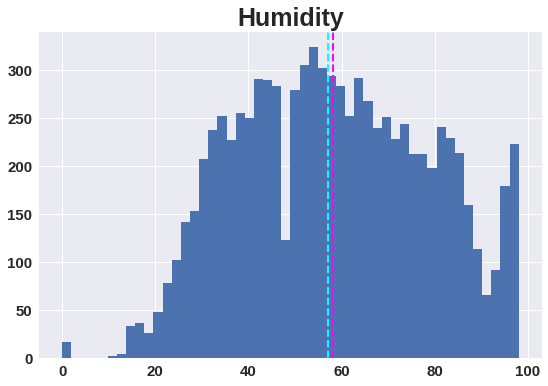

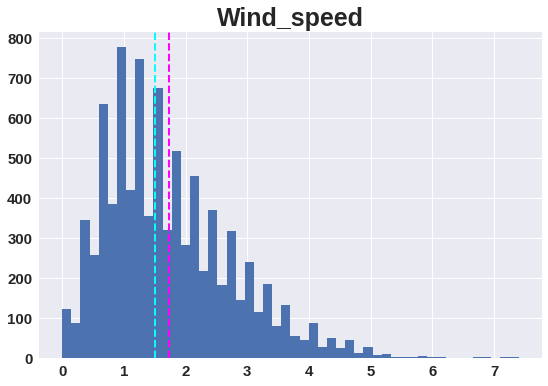

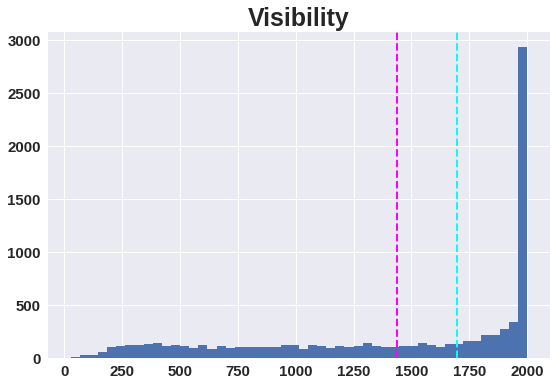

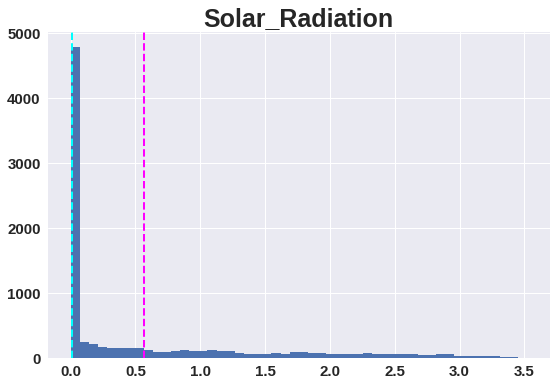

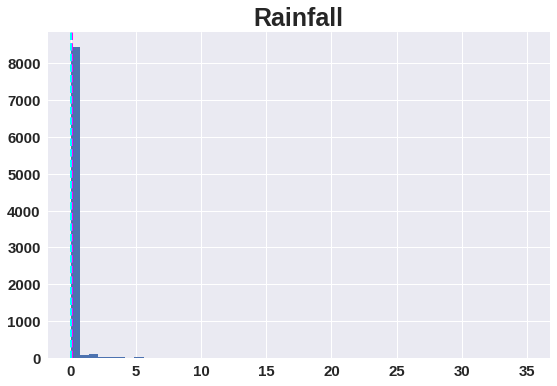

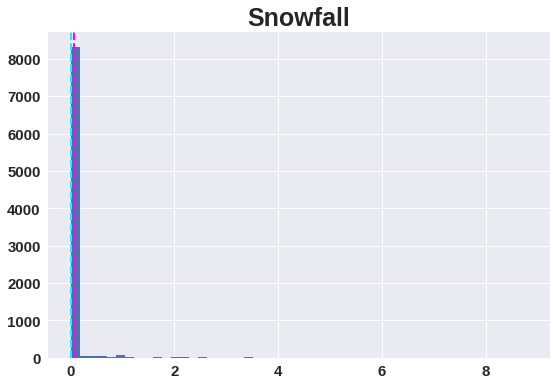

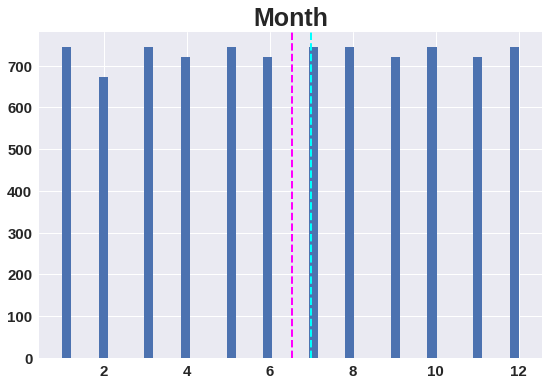

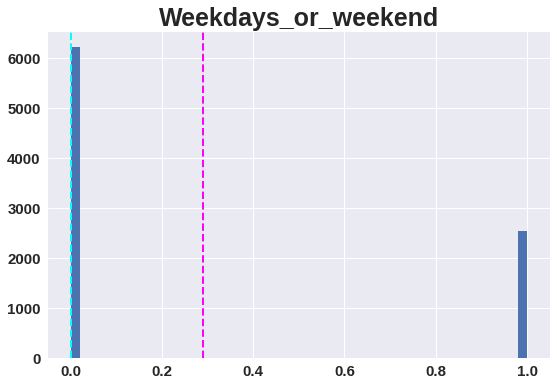

In [46]:
# plot a bar plot for each numerical feature count 

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

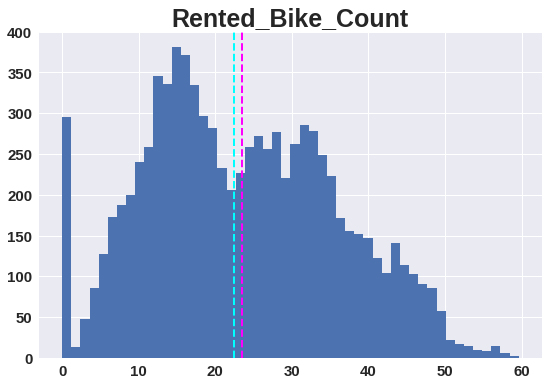

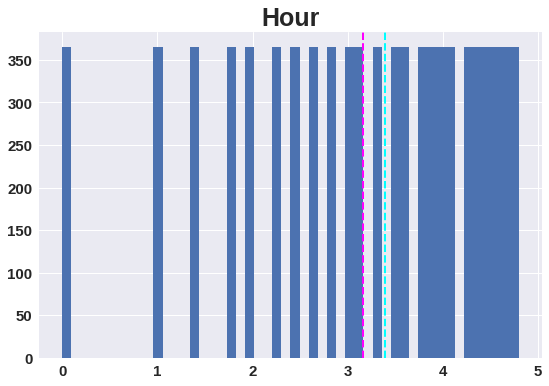

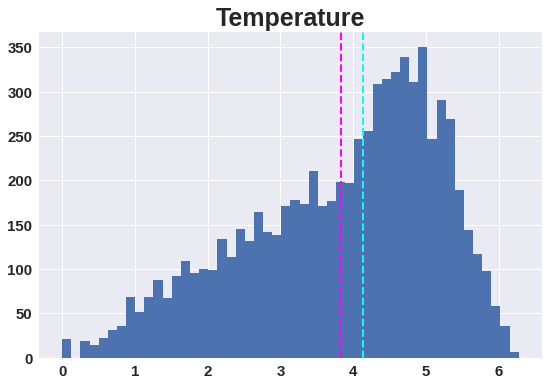

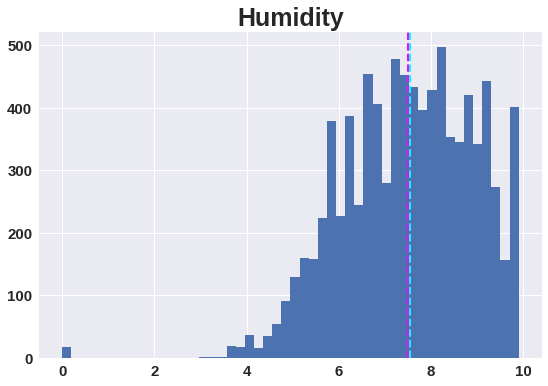

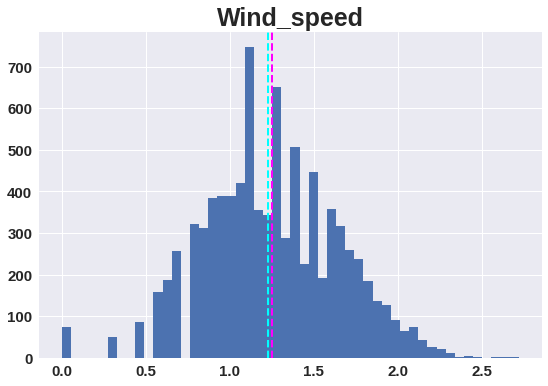

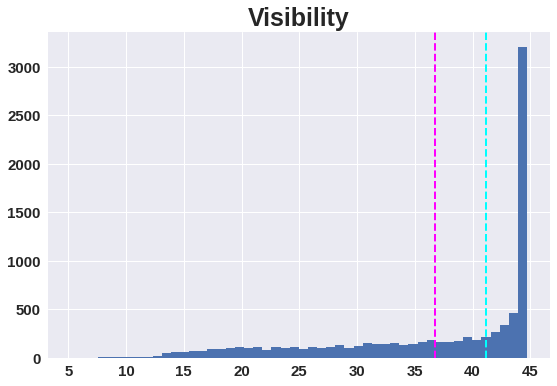

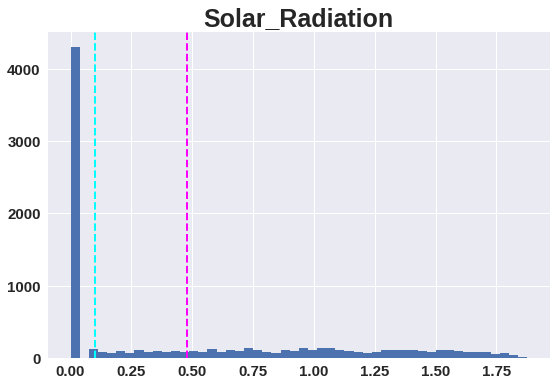

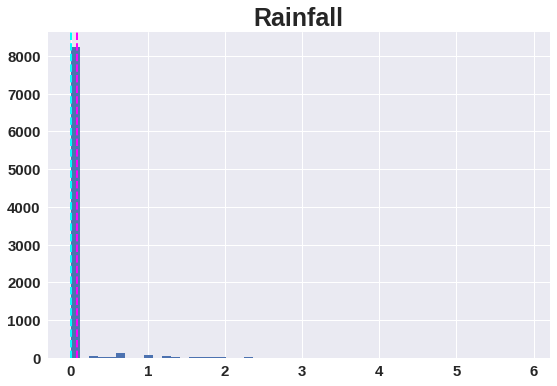

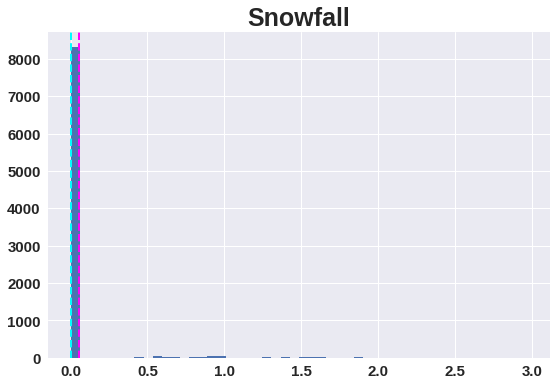

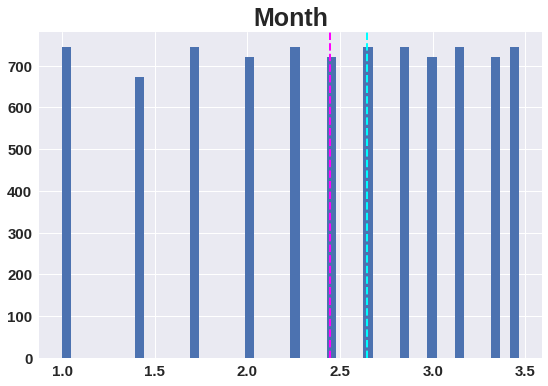

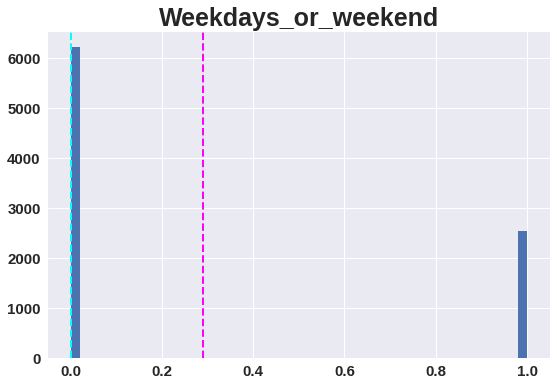

In [47]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

## Lets check the relationship between the dependent variable-"rented bike count'and remanining columns(independent variable).

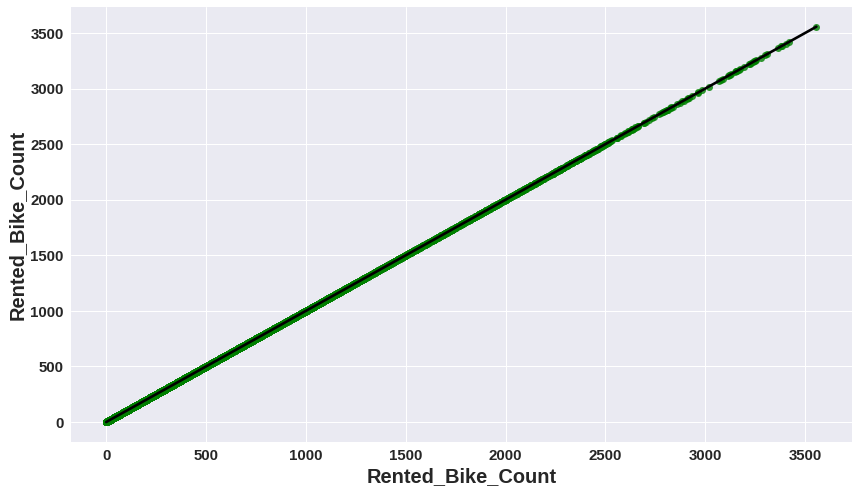

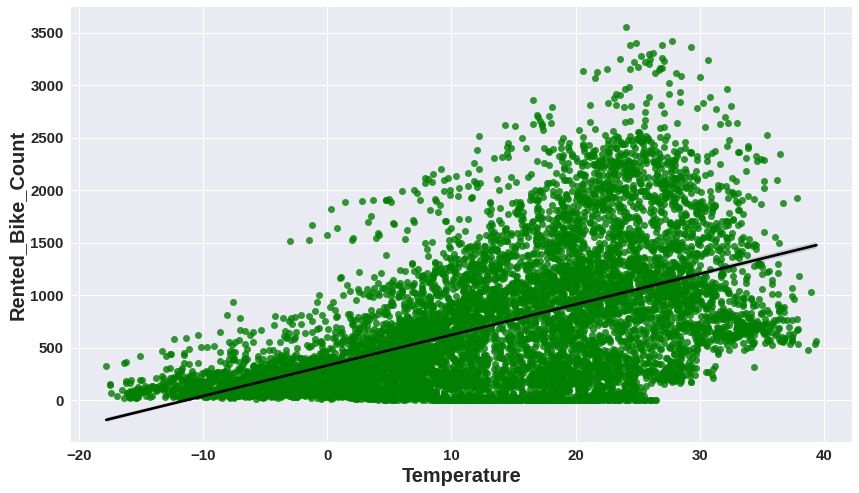

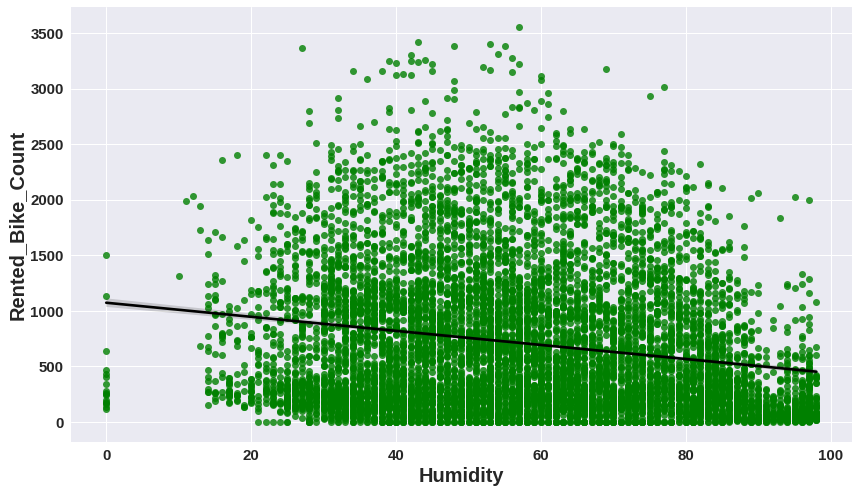

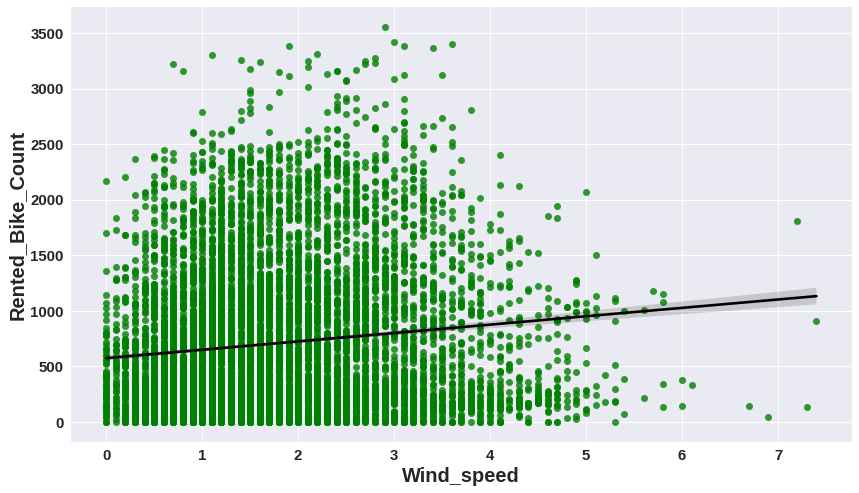

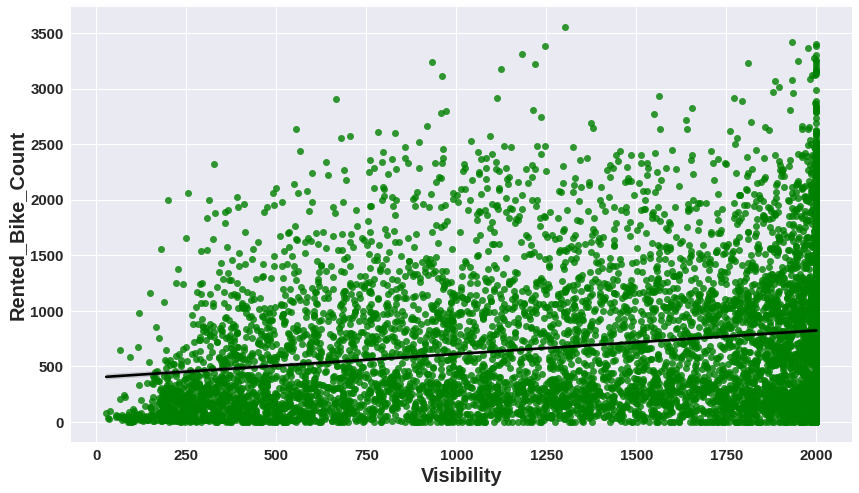

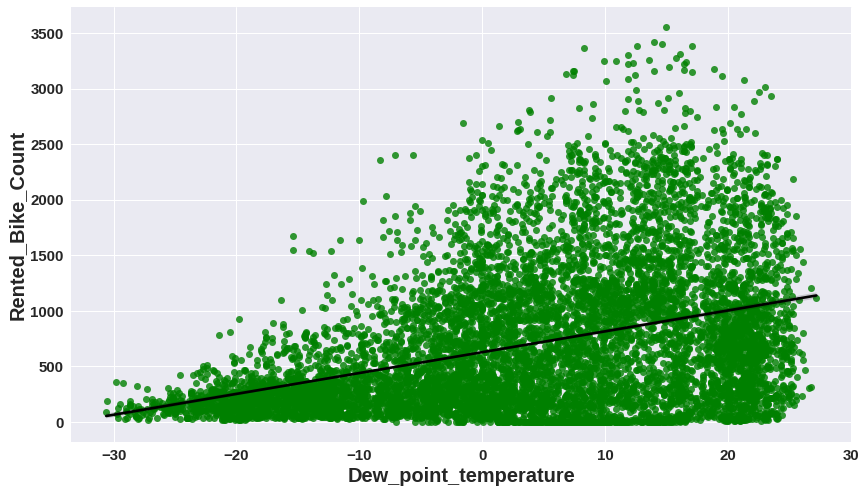

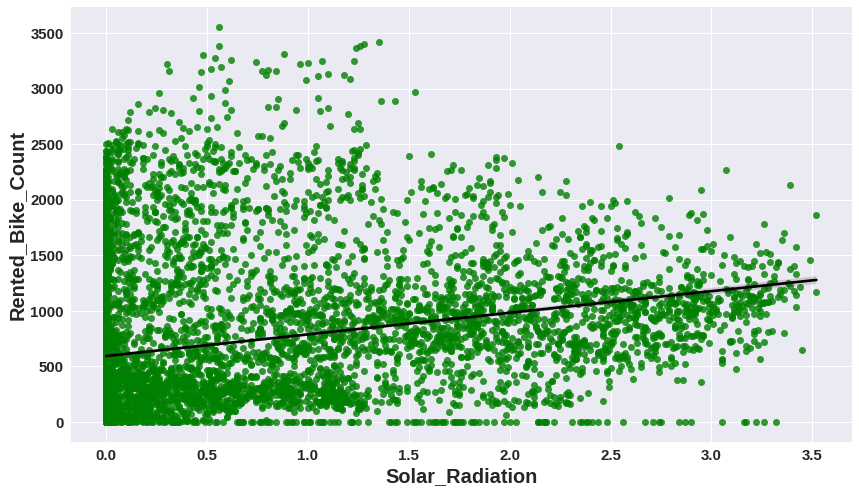

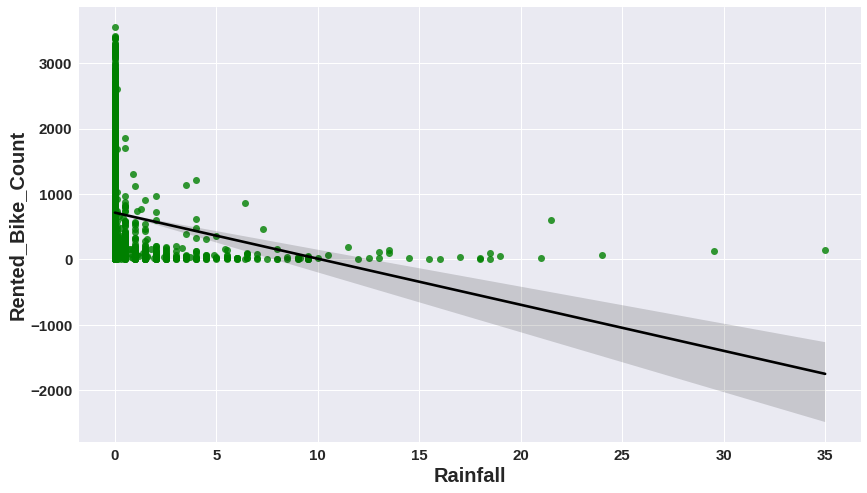

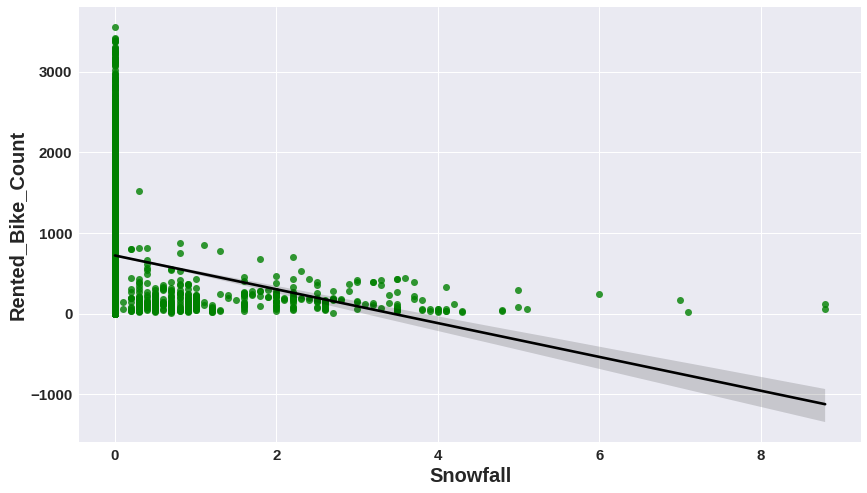

In [48]:
for col in numeric_col:
  plt.figure(figsize=(14,8))
  ax=fig.gca()
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={'color':'green'},line_kws={'color':'black'})

## **Hour:**
 #### 1)There is sudden peak between 7AM to 10 AM. Office time,College and going time could be the reason for this sudden peak.
 #### 2) Again there is peak between 10 AM to 7 PM. may be its office leaving time for the above people.
  #### 3) We can say that,from morning 7 AM to Evening 7 PM we have good Bike Rent Count. and from 7 PM to 7 AM Bike Rent count starts declining.

## **Temperature:**
####1) For decrease in temperature below 0 deg celicus the bike rent count is significantly decreased because may be people dont want to ride bike in such cold temperature.
####2) But for normal temperature the Bike rent count is very high.

## **humidity**
####1) Here its seems like humidty is inversely proportional to bike rent count. As humdity percentage is increasing there is decrease in bike rent count.

## **Wind Speed:**
####1) upto wind speed 4 m/s there is good bike rent count.

## **Visibility**
####1) It's very obivious that as visibilty increases the bike rent count also increases. Nobody would prefere to ride in low visibilty.

## **Dew Point Temperature**
####1)It's again the same case as of temperature. As dew temperature goes below 0 deg celcius there is less bike rent count. It looks like Dew Point temperature nad Temperature columns have strong colinarity.

## **Solar radiation**
####1)Here the amount of rented bikes is huge, when there is solar radiation.

## **Rainfall And snowfall**
####1) Its very obivious that people usually do not like ride bikes in rain and snowfall.



 

#Checking Corelation between dependent and independent variable.

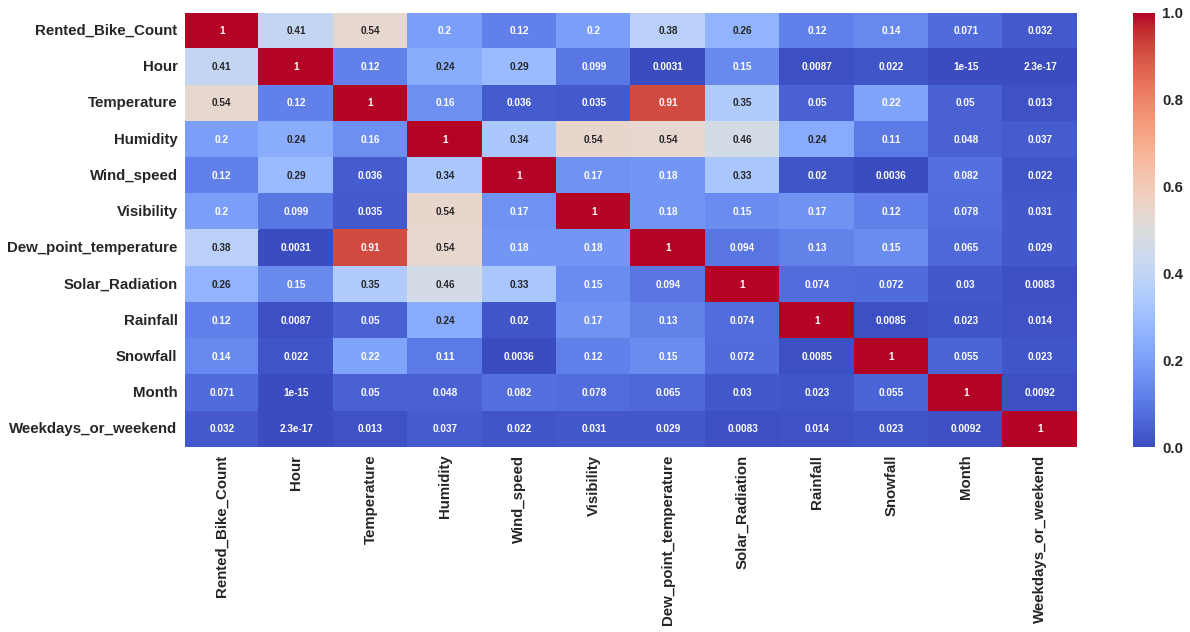

In [49]:
plt.figure(figsize=(20,8))
corr=bike_df.corr()
sns.heatmap(data=abs(corr),annot=True,cmap='coolwarm')

## As per our regression assumption, there should not be colinearity between independent variables.
## We can see from the heatmap that "Temperature" and "Dew Point Temperature" are highly corelated. We can drop one of them.As the corelation between temperature and our dependent variable "Bike Rented Count" is high. So we will Keep the Temperature column and drop the "Dew Point Temperature" column.
## And also we dropping "Date" column as its not useful for us(as we have created the month, weekdays and weekend columns.

In [50]:
# Drop Dew Point Temperature and Date Columns
bike_df.drop(labels=['Dew_point_temperature'],axis= 1,inplace=True)



In [51]:
bike_df.shape

(8760, 13)

In [52]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,1,0


#Data Encoding

In [53]:
# Check Unique Values
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [54]:

# map the coluumn values with numbers
bike_df['Seasons']=bike_df['Seasons'].map({'Winter':0,'Spring':1,'Summer':2,'Autumn':3})

In [55]:
# check Unique Values to confirm encoding
bike_df['Seasons'].unique()

array([0, 1, 2, 3])

In [56]:
# check Unique Values
bike_df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [57]:
# map the coluumn values with numbers
bike_df['Holiday']=bike_df['Holiday'].map({'No Holiday':0,'Holiday':1,})

In [58]:
# check Unique Values to confirm encoding
bike_df['Holiday'].unique()

array([0, 1])

In [59]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,1,0


In [61]:
bike_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Hour                 8760 non-null   int64  
 2   Temperature          8760 non-null   float64
 3   Humidity             8760 non-null   int64  
 4   Wind_speed           8760 non-null   float64
 5   Visibility           8760 non-null   int64  
 6   Solar_Radiation      8760 non-null   float64
 7   Rainfall             8760 non-null   float64
 8   Snowfall             8760 non-null   float64
 9   Seasons              8760 non-null   int64  
 10  Holiday              8760 non-null   int64  
 11  Month                8760 non-null   int64  
 12  Weekdays_or_weekend  8760 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 1.2 MB


## Modeling

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
bike_df.columns.tolist()

['Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Month',
 'Weekdays_or_weekend']

In [65]:
X=bike_df.drop('Rented_Bike_Count',axis=1)
y=bike_df['Rented_Bike_Count']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(7008, 12)
(1752, 12)


In [73]:
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()